# Visualizing Simulation Results
### Authors:
##### Justin Tung:      'https://github.com/JayTongue'
##### Matt Adam-Houser: 'https://github.com/mhouser42'

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib
import pickle
import networkx as nx
import ipywidgets
from ipywidgets import widgets
from IPython.display import Image 

from run_simulation import saturation_main  # Custom function from run_simulation.py
from visualization_functions import *

---------------------------------
----------------------------------
# 1. Running and Visualizing One Simulation

Sample output from one simulation of the saturation code:

saturation_main() takes two arguments:

`run_mode` types are "Poison ToH", "Population-Based Countermeasures", "Quarantine", or "All"

`iterations` is the number of years for which you want to run the simulation for

This notebook and these files are largely designed to run without additional user input.

In [15]:
years_run = 15
run_mode = 'Baseline'
use_methods = False
simulation_df = saturation_main(run_mode, years_run, use_methods=use_methods) # Change this to change the number of years
simulation_df

{'Cook': <my_classes.County object at 0x15b03b690>, 'DuPage': <my_classes.County object at 0x15b401b90>, 'Kane': <my_classes.County object at 0x15a81e610>, 'Will': <my_classes.County object at 0x15aab1990>, 'Winnebago': <my_classes.County object at 0x15aab35d0>, 'Lake': <my_classes.County object at 0x15ad10cd0>, 'McHenry': <my_classes.County object at 0x15a0097d0>, 'St. Clair': <my_classes.County object at 0x15b00ed10>, 'Kendall': <my_classes.County object at 0x15aaa0890>, 'Madison': <my_classes.County object at 0x15aaacf90>, 'Rock Island': <my_classes.County object at 0x15a040690>, 'Peoria': <my_classes.County object at 0x15b601e10>, 'Sangamon': <my_classes.County object at 0x15a0255d0>, 'Tazewell': <my_classes.County object at 0x15a847ad0>, 'Champaign': <my_classes.County object at 0x15aa25410>, 'Boone': <my_classes.County object at 0x15ad3ef50>, 'Macon': <my_classes.County object at 0x15a835a10>, 'Kankakee': <my_classes.County object at 0x12feb6350>, 'DeKalb': <my_classes.County obj

,County,year 0,year 1,year 2,year 3,year 4,year 5,year 6,year 7,year 8,year 9,year 10,year 11,year 12,year 13,year 14,year 15
0,Cook,0.3,0.301480,0.269791,0.419306,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,DuPage,0.0,0.124582,0.344205,0.693844,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,Kane,0.1,0.065314,0.150087,0.582737,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,Will,0.0,0.113981,0.248871,0.463521,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,Winnebago,0.0,0.000000,0.077558,0.259579,0.427262,1.000000,1.000000,1.000000,1.000000,1.000000,0.760075,0.749428,0.858542,0.921123,0.802253,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Henderson,0.0,0.146554,0.495835,0.786176,1.000000,0.921681,1.000000,1.000000,1.000000,0.847005,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
98,Calhoun,0.0,0.000000,0.000003,0.000121,0.000000,0.105997,0.083444,0.386354,0.582295,1.000000,1.000000,0.980032,1.000000,1.000000,1.000000,1.000000
99,Schuyler,0.0,0.000000,0.017405,0.057577,0.144380,0.653776,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
100,Gallatin,0.0,0.045986,0.156329,0.208436,0.770984,1.000000,1.000000,0.225740,1.000000,1.000000,0.705102,1.000000,1.000000,1.000000,1.000000,0.585139


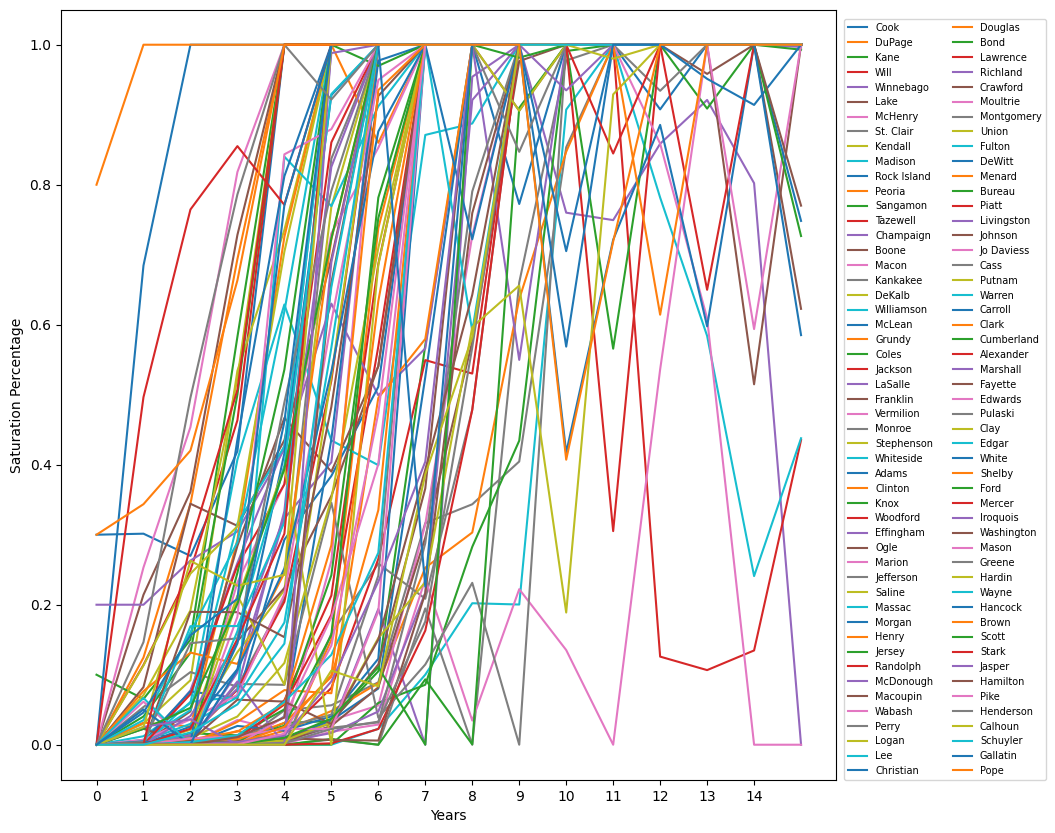

In [16]:
visual_df = make_visual_df(simulation_df)

# Make plots for each county
plt.figure(figsize=(10,10))
for county in visual_df.columns:
    plt.plot(visual_df.index, visual_df[county])
plt.xticks(ticks=range(0, years_run),
    labels=range(0, years_run))
plt.xlabel('Years')
plt.ylabel('Saturation Percentage')
plt.legend(visual_df.columns, loc=(1.01, 0), fontsize=7, ncol=2)
plt.show()

While this graph can display the lanternfly life-cyclem, where adults die in the winter and eggs hatch in the spring, the graph is otherwise is not very helpful. Since there are 102 Counties in Illinois, the resulting graph is messy and visually confusing. 

An alternative way of visualizing this data may be with a sort of heatmap instead

In [17]:
path = 'data/location'
edges = pd.read_csv(f'{path}/county_edges.csv')

CG = pickle.load(open(f'{path}/IL_graph.dat', 'rb'))
handler = pickle.load(open(f'{path}/graph_handler_counties.dat', 'rb'))
highways = pickle.load(open(f'{path}/osmnx_highways.dat', 'rb'))

In [18]:
widgets.interact(make_network_heat,
                 CG=widgets.fixed(CG),
                 handler=widgets.fixed(handler),
                 simulation_df=widgets.fixed(simulation_df),
                 year=widgets.IntSlider(min=0, max=years_run - 1, step=1, layout=widgets.Layout(width='800px')),
)

interactive(children=(IntSlider(value=0, description='year', layout=Layout(width='800px'), max=14), Output()),…

<function visualization_functions.make_network_heat(CG: networkx.classes.graph.Graph, simulation_df: pandas.core.frame.DataFrame, handler: dict, year: int)>

In order to better see the flow of saturations from week to week, we animated the slider:

In [19]:
play = widgets.interact(make_network_heat,
                        CG=widgets.fixed(CG),
                        handler=widgets.fixed(handler),
                        simulation_df=widgets.fixed(simulation_df),year=widgets.Play(value=0,
                                                                                      min=0,
                                                                                      max=years_run - 1,
                                                                                      step=1,
                                                                                      interval=750,
                                                                                      disabled=False,
                                                                                     ))

interactive(children=(Play(value=0, description='year', interval=750, max=14), Output()), _dom_classes=('widge…

Showing the saturation of the state as a whole is more helpful than each individual county:

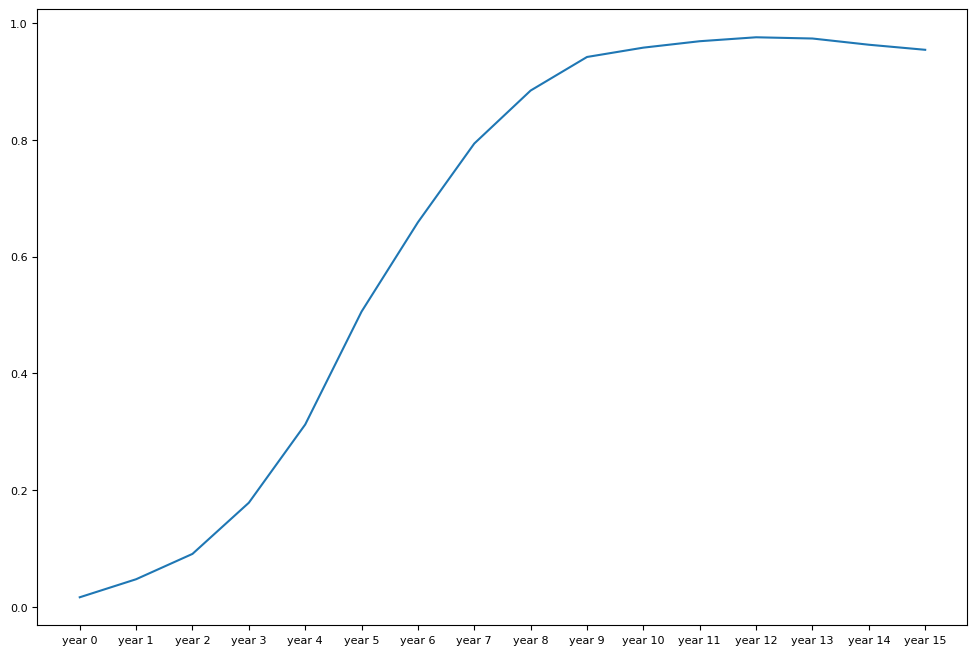

In [20]:
avg_df = visual_df.mean(axis=1)
plt.figure(figsize=(12,8))
plt.plot(avg_df.index, avg_df.iloc[0:, ])
plt.tick_params(labelsize=8)

--------------------------------
# 2. Running the Simulation as a Monte Carlo and Plotting the Results

With this line graph, we can run the simulation as many times as desired and compare the results.

This interactive graph shows different run modes, different experiment durations, and different numbers of simulations.

In [21]:
widgets.interact(model_variables,
    run_mode =['Baseline', 'Poison ToH', 'Population-Based Countermeasures', 'Quarantine', 'All'],
    sims_run = (10, 100, 10),
    sim_years = (1, 60, 1),
    value='Baseline',
    disabled=False,

)

interactive(children=(Dropdown(description='run_mode', options=('Baseline', 'Poison ToH', 'Population-Based Co…

<function visualization_functions.model_variables(run_mode: str, sims_run: int, sim_years: int)>

------------------------------------------------
# 3. Model the Impact of a Experimental Variable Manipulation

After running multiple simulations on each model, the resulting average trend lines can be determined for each experimental varaible.

Note that these simulations are extended to 30 years to show longer-term trends.

{'Cook': <my_classes.County object at 0x15b687950>, 'DuPage': <my_classes.County object at 0x15b5f5590>, 'Kane': <my_classes.County object at 0x15b5f6490>, 'Will': <my_classes.County object at 0x15b5f7c90>, 'Winnebago': <my_classes.County object at 0x15b5f5bd0>, 'Lake': <my_classes.County object at 0x15b5f40d0>, 'McHenry': <my_classes.County object at 0x15b5ce350>, 'St. Clair': <my_classes.County object at 0x15b5cc210>, 'Kendall': <my_classes.County object at 0x15b5ccd50>, 'Madison': <my_classes.County object at 0x15b5cf090>, 'Rock Island': <my_classes.County object at 0x15b5cdfd0>, 'Peoria': <my_classes.County object at 0x15b5cecd0>, 'Sangamon': <my_classes.County object at 0x15b5cf450>, 'Tazewell': <my_classes.County object at 0x15b5c3b50>, 'Champaign': <my_classes.County object at 0x15b5c2e90>, 'Boone': <my_classes.County object at 0x15b5c2490>, 'Macon': <my_classes.County object at 0x15b5c18d0>, 'Kankakee': <my_classes.County object at 0x15b5c09d0>, 'DeKalb': <my_classes.County obj

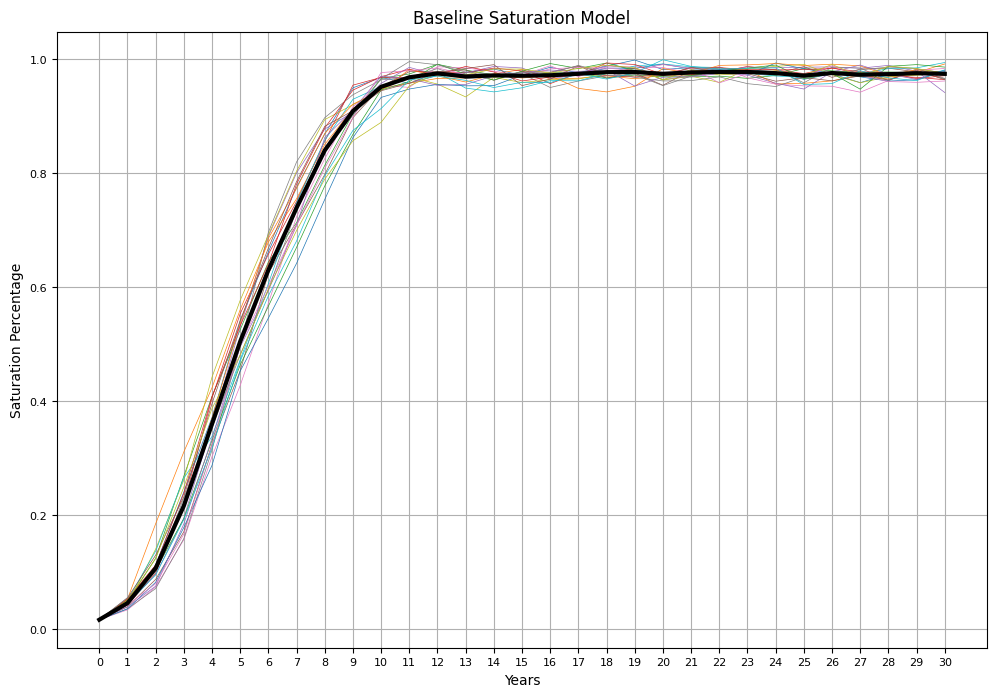

{'Cook': <my_classes.County object at 0x15b55a510>, 'DuPage': <my_classes.County object at 0x15b4d6ad0>, 'Kane': <my_classes.County object at 0x15b4d5210>, 'Will': <my_classes.County object at 0x15b4d5c50>, 'Winnebago': <my_classes.County object at 0x15b4d4ed0>, 'Lake': <my_classes.County object at 0x15b4d5f90>, 'McHenry': <my_classes.County object at 0x15b4d4110>, 'St. Clair': <my_classes.County object at 0x15b4d7090>, 'Kendall': <my_classes.County object at 0x15b457f90>, 'Madison': <my_classes.County object at 0x15b457f50>, 'Rock Island': <my_classes.County object at 0x15b454490>, 'Peoria': <my_classes.County object at 0x15b456b50>, 'Sangamon': <my_classes.County object at 0x15b455910>, 'Tazewell': <my_classes.County object at 0x15b455050>, 'Champaign': <my_classes.County object at 0x15b454610>, 'Boone': <my_classes.County object at 0x15b451450>, 'Macon': <my_classes.County object at 0x15b453d10>, 'Kankakee': <my_classes.County object at 0x15b4531d0>, 'DeKalb': <my_classes.County obj

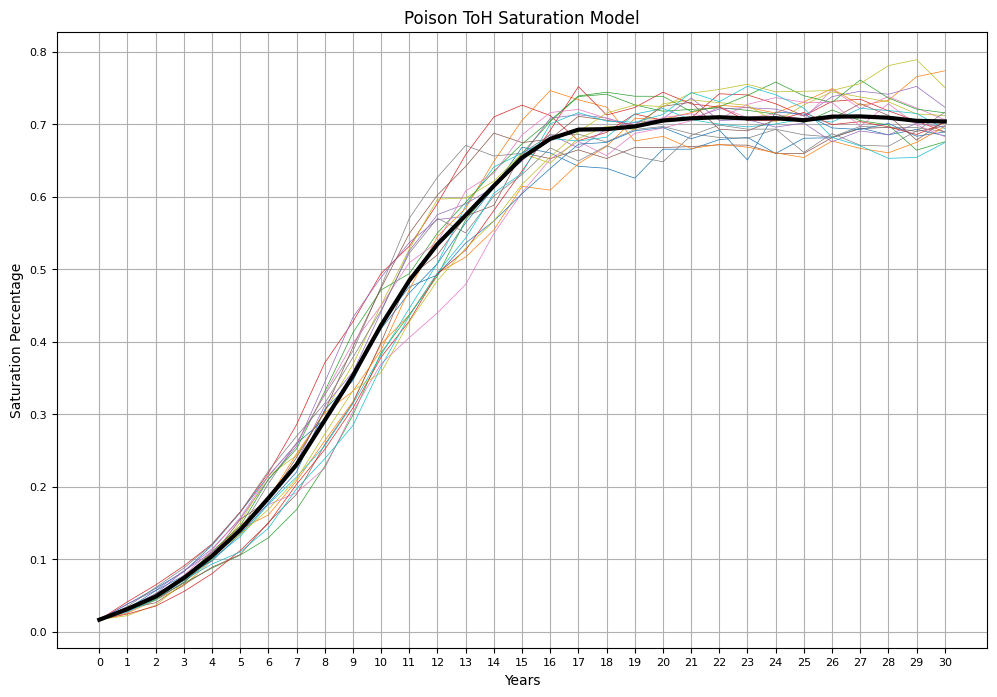

{'Cook': <my_classes.County object at 0x15b6038d0>, 'DuPage': <my_classes.County object at 0x15b650ad0>, 'Kane': <my_classes.County object at 0x15b653850>, 'Will': <my_classes.County object at 0x15b652bd0>, 'Winnebago': <my_classes.County object at 0x15b6532d0>, 'Lake': <my_classes.County object at 0x15b650050>, 'McHenry': <my_classes.County object at 0x15b653750>, 'St. Clair': <my_classes.County object at 0x15b651350>, 'Kendall': <my_classes.County object at 0x15b652450>, 'Madison': <my_classes.County object at 0x15b651010>, 'Rock Island': <my_classes.County object at 0x15b652110>, 'Peoria': <my_classes.County object at 0x15b6525d0>, 'Sangamon': <my_classes.County object at 0x12fc2ffd0>, 'Tazewell': <my_classes.County object at 0x12fc2d3d0>, 'Champaign': <my_classes.County object at 0x12fc2d0d0>, 'Boone': <my_classes.County object at 0x12fc2d890>, 'Macon': <my_classes.County object at 0x15b631fd0>, 'Kankakee': <my_classes.County object at 0x15b630750>, 'DeKalb': <my_classes.County obj

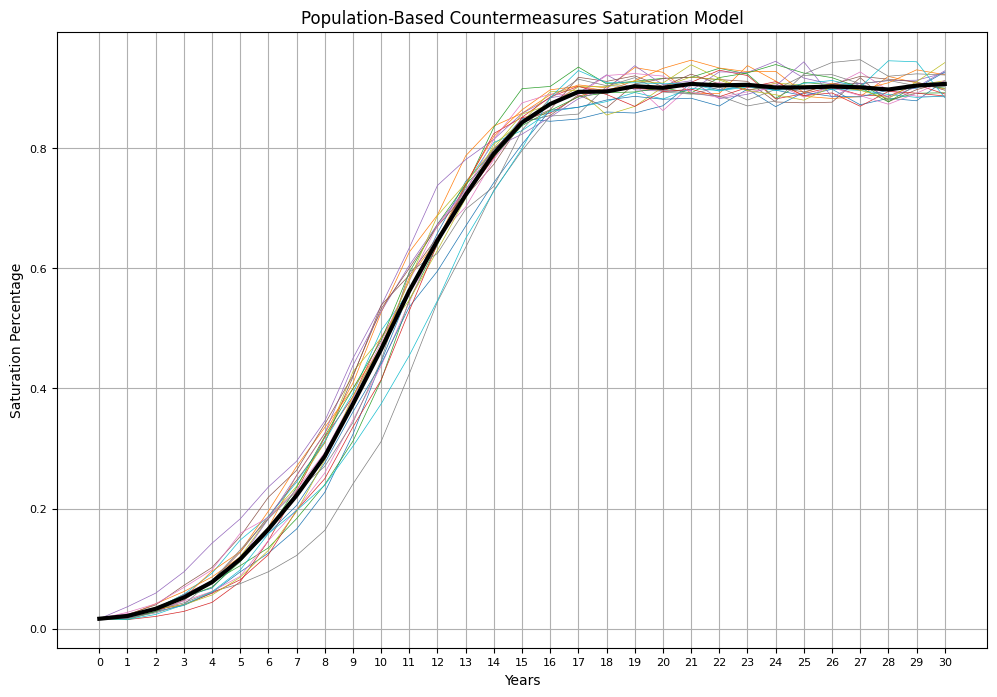

{'Cook': <my_classes.County object at 0x12ff96a90>, 'DuPage': <my_classes.County object at 0x15b5240d0>, 'Kane': <my_classes.County object at 0x15b527dd0>, 'Will': <my_classes.County object at 0x15b527450>, 'Winnebago': <my_classes.County object at 0x12fd2e690>, 'Lake': <my_classes.County object at 0x15b5a0610>, 'McHenry': <my_classes.County object at 0x15b5a2ad0>, 'St. Clair': <my_classes.County object at 0x15b5a0e90>, 'Kendall': <my_classes.County object at 0x15b5a09d0>, 'Madison': <my_classes.County object at 0x15b5a37d0>, 'Rock Island': <my_classes.County object at 0x15b5a0390>, 'Peoria': <my_classes.County object at 0x15b5a3550>, 'Sangamon': <my_classes.County object at 0x12fed1c50>, 'Tazewell': <my_classes.County object at 0x12fed2350>, 'Champaign': <my_classes.County object at 0x12fed3f10>, 'Boone': <my_classes.County object at 0x15a0c1e10>, 'Macon': <my_classes.County object at 0x15a0c06d0>, 'Kankakee': <my_classes.County object at 0x15a0c3c10>, 'DeKalb': <my_classes.County obj

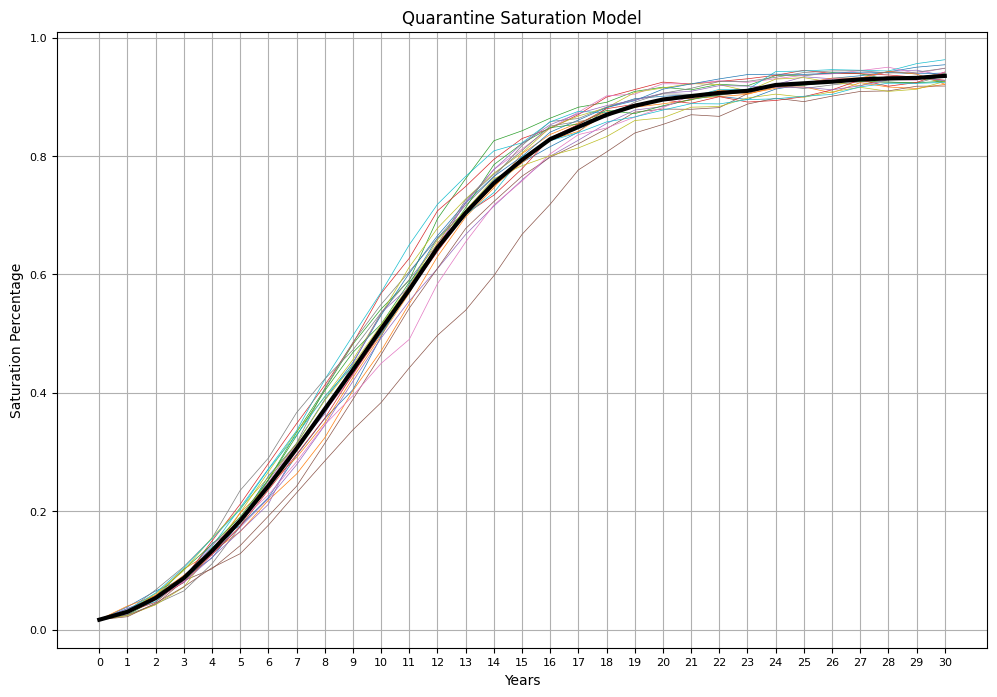

{'Cook': <my_classes.County object at 0x15a013950>, 'DuPage': <my_classes.County object at 0x15c11eed0>, 'Kane': <my_classes.County object at 0x15c138250>, 'Will': <my_classes.County object at 0x15c25a9d0>, 'Winnebago': <my_classes.County object at 0x15a0c0350>, 'Lake': <my_classes.County object at 0x12ff5f8d0>, 'McHenry': <my_classes.County object at 0x12ff5e010>, 'St. Clair': <my_classes.County object at 0x15c291910>, 'Kendall': <my_classes.County object at 0x15c49af10>, 'Madison': <my_classes.County object at 0x15c49aa10>, 'Rock Island': <my_classes.County object at 0x15c064950>, 'Peoria': <my_classes.County object at 0x15bdbfcd0>, 'Sangamon': <my_classes.County object at 0x15c4c3ed0>, 'Tazewell': <my_classes.County object at 0x15c436210>, 'Champaign': <my_classes.County object at 0x15bd111d0>, 'Boone': <my_classes.County object at 0x15c02c610>, 'Macon': <my_classes.County object at 0x15be09f90>, 'Kankakee': <my_classes.County object at 0x15c0f13d0>, 'DeKalb': <my_classes.County obj

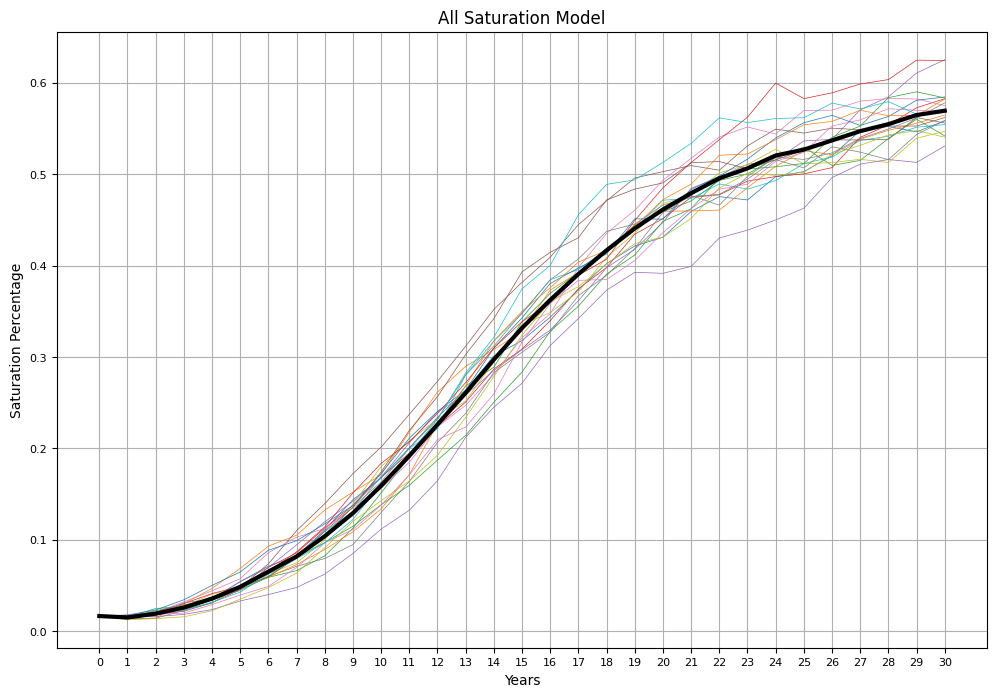

In [22]:
sims_run = 20  # RIP my RAM
sim_years = 30

all_trends = {}
for mode in ['Baseline', 'Poison ToH', 'Population-Based Countermeasures', 'Quarantine', 'All']:
    all_trends = model_variables_avg(mode, sims_run, sim_years, all_trends)

-----------------------------------------------
# 4. Compare Average Trend Lines to Determine Efficacy of Interventions

By comparing the derived trend lines, the effect of each proposed intervention can be compared.

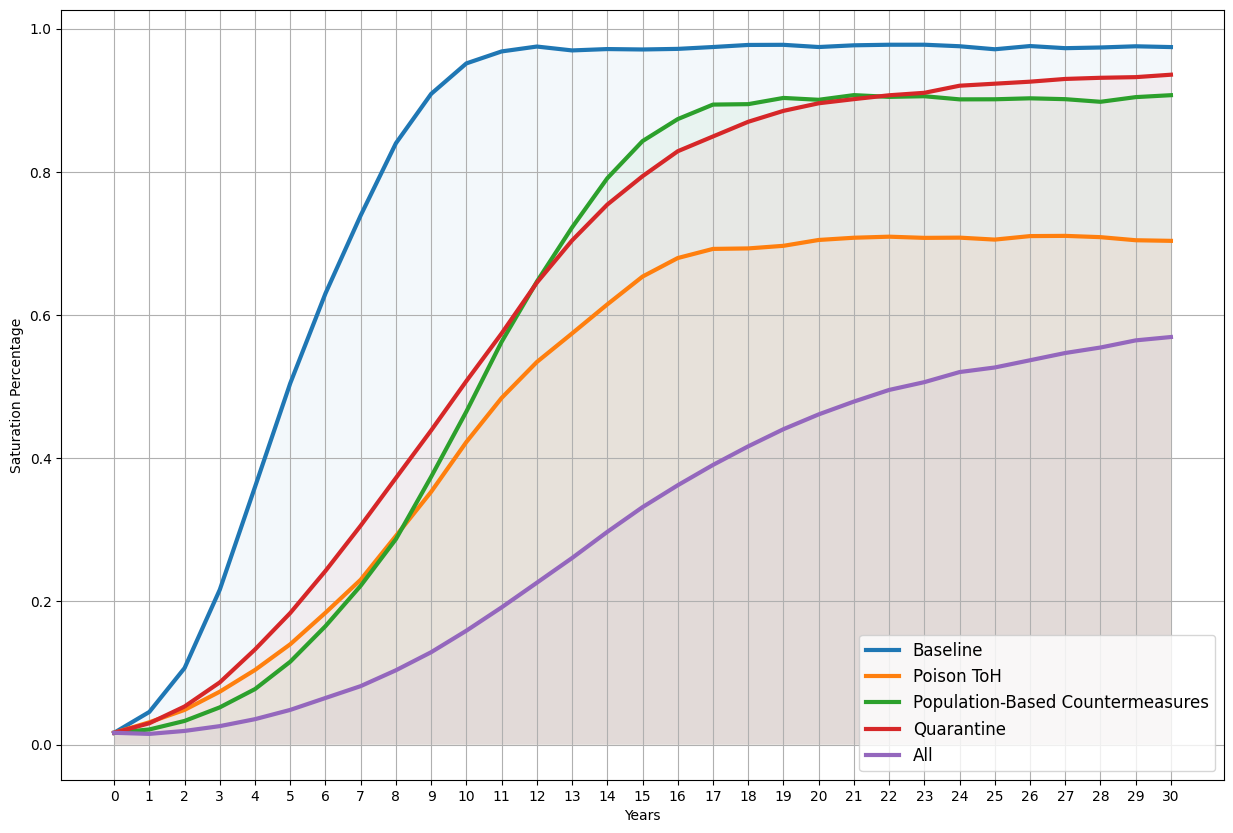

In [23]:
fig, ax = plt.subplots(figsize=(15, 10))

plt.xticks(ticks=range(0, sim_years+1),
            labels=range(0, sim_years+1))
plt.xlabel('Years')
plt.ylabel('Saturation Percentage')

for model in all_trends:
    trend_sr = all_trends[model]
    X = trend_sr.index.tolist()
    Y = trend_sr.values.tolist()
    
    ax.plot(X, Y, label=model, linewidth=3)
    ax.fill_between(X, Y, 0, alpha=0.05, interpolate=True)

plt.grid()
plt.legend(fontsize=12)
plt.show()